# Data Analysis on RAW DATA

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

## Read The Data

In [2]:
data = pd.read_csv('kidney_disease_train.csv')
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39.0,7900,3.9,yes,yes,no,good,no,no,ckd
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,43.0,7200,5.5,no,no,no,good,no,no,notckd
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,...,39.0,8300,4.6,yes,no,no,poor,no,no,ckd


In [3]:
data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [4]:
data.isnull().sum()

id                  0
age                 5
bp                  9
sg                 36
al                 35
su                 38
rbc               107
pc                 50
pcc                 4
ba                  4
bgr                33
bu                 14
sc                 12
sod                67
pot                68
hemo               39
pcv                51
wc                 77
rc                 93
htn                 1
dm                  1
cad                 1
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

In [5]:
for var in ['age', 'bp', 'sg', 'al', 'su','bgr','bu','sc','sod','pot','hemo','pcv']:
    value = data[var].mean()
    data[var] = data[var].fillna(value)

In [6]:
data.isnull().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               107
pc                 50
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                 77
rc                 93
htn                 1
dm                  1
cad                 1
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

In [7]:
for var in ['rbc', 'pc', 'pcc', 'ba','wc','rc','htn','dm','cad']:
    value = data[var].mode()
    print(data[var].unique())

['normal' nan 'abnormal']
['abnormal' nan 'normal']
['notpresent' 'present' nan]
['notpresent' 'present' nan]
['7900' nan '7200' '8300' '4200' '9900' '10500' '2200' '7500' '8400'
 '15700' '7000' '4700' '9600' '6700' '9000' '5900' '4300' '12700' '5500'
 '5000' '9700' '6900' '9800' '5800' '6400' '8100' '15200' '5600' '14900'
 '9100' '26400' '8000' '6500' '9200' '6800' '10800' '4500' '\t?' '10700'
 '11000' '9400' '6300' '10300' '9500' '6200' '6600' '4100' '7700' '5400'
 '13600' '\t8400' '11500' '10900' '12200' '8600' '7300' '5200' '7400'
 '12800' '6000' '9300' '7800' '10400' '8800' '10200' '16700' '8500'
 '21600' '12500' '13200' '5100' '12300' '18900' '5700' '8200' '16300'
 '4900' '14600']
['3.9' nan '5.5' '4.6' '3.4' '4.7' '6.1' '2.6' '5.6' '3.3' '3.8' '5.0'
 '4.5' '5.7' '3.5' '6.0' '5.2' '4.2' '3.7' '5.9' '4.9' '4.8' '3.2' '3.0'
 '3.6' '4.0' '2.5' '4.1' '6.2' '5.1' '6.5' '5.8' '4.4' '5.4' '3' '4.3' '4'
 '2.1' '8.0' '5.3' '3.1' '2.3' '\t?' '2.9' '6.3' '6.4' '2.4' '2.7' '5']
['yes' 'no' n

In [8]:
data['rbc'] = data['rbc'].fillna("normal")
data["pc"] = data["pc"].fillna('normal')
data["pcc"] = data["pcc"].fillna('notpresent')
data["ba"] = data["ba"].fillna('notpresent')
data["wc"] = data["wc"].fillna('9600')
data["rc"] = data["rc"].fillna('5.2')
data["htn"] = data["htn"].fillna('no')
data["dm"] = data["dm"].fillna('no')
data["cad"] = data["cad"].fillna('no')

In [9]:
data['classification'] = data['classification'].map({'notckd':1,'ckd':0})
data['rbc'] = data['rbc'].map({'normal':1,'abnormal':0})
data['pc'] = data['pc'].map({'notpresent':1,'present':0})
data['pcc'] = data['pcc'].map({'notpresent':1,'present':0})
data['htn'] = data['htn'].map({'yes':1,'no':0})
data['dm'] = data['dm'].map({'yes':1,'no':0})
data['cad'] = data['cad'].map({'yes':1,'no':0})
data["ba"] = data["ba"].map({'notpresent':1,'present':0})
data['appet'] = data['appet'].map({'poor':1,'good':0})
data['pe'] = data['pe'].map({'no':1,'yes':0})
data['ane'] = data['ane'].map({'no':1,'yes':0})

In [10]:
data["dm"] = data["dm"].fillna(0)
data["cad"] = data["cad"].fillna(0)
data["pc"] = data["pc"].fillna(0)

In [11]:
data['dm'].mode()

0    0.0
dtype: float64

In [12]:
data['appet'].unique()

array([0, 1], dtype=int64)

In [13]:
data['cad'].mode()

0    0.0
dtype: float64

In [14]:
data['ane'].unique()

array([1, 0], dtype=int64)

In [15]:
data['cad'].unique()

array([0., 1.])

In [16]:
data.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [17]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025000,3.00000,0.000000,1,0.0,1,1,...,39.000000,7900,3.9,1,1.0,0.0,0,1,1,0
1,109,54.0,70.0,1.017439,1.02449,0.438017,1,0.0,1,1,...,39.165939,9600,5.2,0,1.0,0.0,0,1,1,0
2,17,47.0,80.0,1.017439,1.02449,0.438017,1,0.0,1,1,...,39.165939,9600,5.2,1,0.0,0.0,1,1,1,0
3,347,43.0,60.0,1.025000,0.00000,0.000000,1,0.0,1,1,...,43.000000,7200,5.5,0,0.0,0.0,0,1,1,1
4,24,42.0,100.0,1.015000,4.00000,0.000000,1,0.0,1,0,...,39.000000,8300,4.6,1,0.0,0.0,1,1,1,0


In [18]:
data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int64
pc                float64
pcc                 int64
ba                  int64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                 object
rc                 object
htn                 int64
dm                float64
cad               float64
appet               int64
pe                  int64
ane                 int64
classification      int64
dtype: object

In [19]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

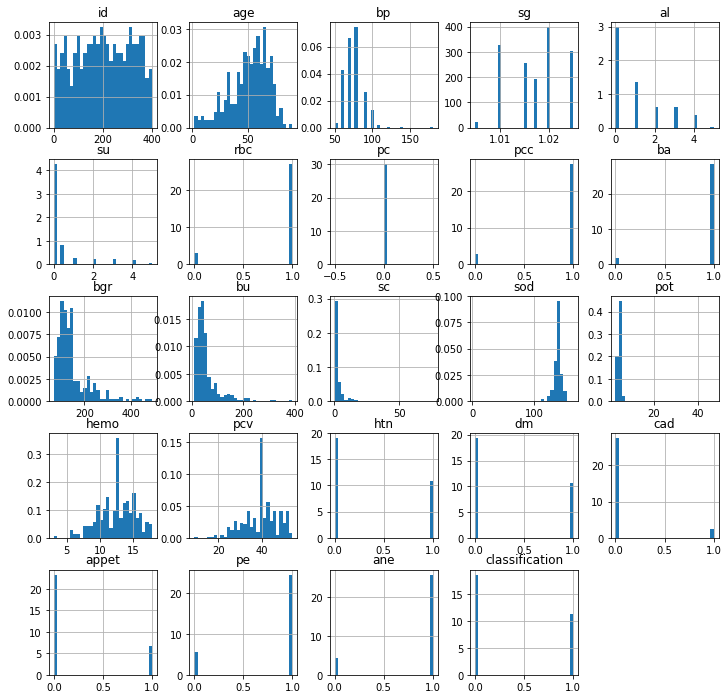

In [20]:
data.hist(bins=30, figsize=(12,12), density=True)
plt.show()

In [21]:
X = data[['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
     'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 
     'cad','appet', 'pe', 'ane']]
y = data[['classification']]

# Test and Train Split

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100)

# Correlation

In [23]:
X_train.corr()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,sod,pot,hemo,pcv,htn,dm,cad,appet,pe,ane
age,1.000000,0.150718,-0.242159,0.139440,0.196305,-0.046650,NaN,-0.209579,-0.076817,0.248401,...,-0.179449,0.052512,-0.216616,-0.235645,0.404830,0.399225,0.198537,0.212789,-0.099548,-0.123336
bp,0.150718,1.000000,-0.181891,0.108635,0.162389,-0.167294,NaN,-0.066311,-0.091123,0.125947,...,-0.033917,0.124847,-0.255961,-0.293845,0.184418,0.241464,0.076919,0.181071,0.033023,-0.193233
sg,-0.242159,-0.181891,1.000000,-0.452111,-0.279312,0.140395,NaN,0.376897,0.230182,-0.349111,...,0.376534,-0.092378,0.568575,0.569535,-0.405900,-0.430108,-0.194391,-0.271181,0.271341,0.238485
al,0.139440,0.108635,-0.452111,1.000000,0.301809,-0.326171,NaN,-0.411736,-0.329948,0.375435,...,-0.380467,0.147334,-0.529955,-0.519976,0.529081,0.436911,0.266254,0.300347,-0.477567,-0.339723
su,0.196305,0.162389,-0.279312,0.301809,1.000000,-0.022902,NaN,-0.152701,-0.044572,0.601104,...,-0.091419,0.256119,-0.194887,-0.208322,0.272794,0.491956,0.228882,0.032150,-0.084790,-0.148517
rbc,-0.046650,-0.167294,0.140395,-0.326171,-0.022902,1.000000,NaN,0.012487,0.023397,-0.146108,...,0.171076,0.023658,0.132006,0.135804,-0.073439,-0.113297,-0.046376,-0.147487,0.091866,0.089019
pc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pcc,-0.209579,-0.066311,0.376897,-0.411736,-0.152701,0.012487,NaN,1.000000,0.388253,-0.321076,...,0.160629,0.010492,0.330066,0.334685,-0.268456,-0.272720,-0.136197,-0.320579,0.249935,0.277501
ba,-0.076817,-0.091123,0.230182,-0.329948,-0.044572,0.023397,NaN,0.388253,1.000000,-0.061581,...,0.201808,0.008982,0.231767,0.253091,-0.188431,-0.141767,-0.293717,-0.179919,0.272418,0.193662
bgr,0.248401,0.125947,-0.349111,0.375435,0.601104,-0.146108,NaN,-0.321076,-0.061581,1.000000,...,-0.264453,0.078295,-0.302922,-0.299331,0.373996,0.544911,0.122740,0.189760,-0.041580,-0.228777


In [24]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [25]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

2

In [26]:
corr_features

{'pcv', 'sc'}

In [27]:
corr_features.add('wc')
corr_features.add('rc')
corr_features.add('pc')

In [28]:
corr_features

{'pc', 'pcv', 'rc', 'sc', 'wc'}

In [29]:
X_train = X_train.drop(corr_features,axis=1)
X_test = X_test.drop(corr_features,axis=1)

In [30]:
X_train

,age,bp,sg,al,su,rbc,pcc,ba,bgr,bu,sod,pot,hemo,htn,dm,cad,appet,pe,ane
258,50.0,76.051661,1.020000,0.00000,0.000000,1,1,1,92.000000,19.000000,150.000000,4.800000,14.900000,0,0.0,0.0,0,1,1
177,80.0,70.000000,1.020000,0.00000,0.000000,1,1,1,150.186235,56.983835,135.000000,4.100000,15.300000,0,0.0,0.0,0,1,1
218,60.0,70.000000,1.010000,2.00000,0.000000,1,0,1,144.000000,72.000000,137.255869,4.754245,9.700000,1,1.0,0.0,1,1,0
242,53.0,60.000000,1.017439,1.02449,0.438017,1,1,1,91.000000,114.000000,142.000000,4.300000,8.600000,1,1.0,0.0,1,0,0
169,2.0,76.051661,1.010000,3.00000,0.000000,1,1,1,150.186235,56.983835,137.255869,4.754245,12.531535,0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,22.0,60.000000,1.025000,0.00000,0.000000,1,1,1,97.000000,18.000000,138.000000,4.300000,13.500000,0,0.0,0.0,0,1,1
66,40.0,80.000000,1.020000,0.00000,0.000000,1,1,1,119.000000,15.000000,150.000000,4.900000,12.531535,0,0.0,0.0,0,1,1
53,60.0,80.000000,1.010000,1.00000,1.000000,1,1,1,172.000000,32.000000,137.255869,4.754245,11.200000,0,1.0,1.0,1,1,1
79,29.0,70.000000,1.020000,0.00000,0.000000,1,1,1,127.000000,44.000000,145.000000,5.000000,14.800000,0,0.0,0.0,0,1,1


In [31]:
X_train.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc        int64
pcc        int64
ba         int64
bgr      float64
bu       float64
sod      float64
pot      float64
hemo     float64
htn        int64
dm       float64
cad      float64
appet      int64
pe         int64
ane        int64
dtype: object

# LogisticRegression

In [32]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

c:\users\chakradharnaidu.s\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\chakradharnaidu.s\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
y_pred = LogReg.predict(X_test)

In [34]:
print("Accuracy for Logistic Regression:",metrics.accuracy_score(y_test, y_pred))

Accuracy for Logistic Regression: 0.9714285714285714


In [35]:
print("confusion_matrix for Logistic Regression:\n",metrics.confusion_matrix(y_test, y_pred))

confusion_matrix for Logistic Regression:
 [[43  2]
 [ 0 25]]


In [36]:
print("classification_report for Logistic Regression:\n",classification_report(y_test, y_pred))

classification_report for Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        45
           1       0.93      1.00      0.96        25

    accuracy                           0.97        70
   macro avg       0.96      0.98      0.97        70
weighted avg       0.97      0.97      0.97        70



# DecisionTree

In [37]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [38]:
y_pred = classifier.predict(X_test)

In [39]:
print("Accuracy for DecisionTreeClassifier:",metrics.accuracy_score(y_test, y_pred))

Accuracy for DecisionTreeClassifier: 0.9571428571428572


In [40]:
print("confusion_matrix for DecisionTreeClassifier:\n",metrics.confusion_matrix(y_test, y_pred))

confusion_matrix for DecisionTreeClassifier:
 [[44  1]
 [ 2 23]]


In [41]:
print("classification_report for DecisionTreeClassifier:\n",classification_report(y_test, y_pred))

classification_report for DecisionTreeClassifier:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       0.96      0.92      0.94        25

    accuracy                           0.96        70
   macro avg       0.96      0.95      0.95        70
weighted avg       0.96      0.96      0.96        70



# RandomForest

In [42]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)

<ipython-input-42-8d31d8eb48f5>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC.fit(X_train,y_train)


RandomForestClassifier()

In [43]:
y_pred = RFC.predict(X_test)

In [44]:
print("Accuracy for RandomForest:",metrics.accuracy_score(y_test, y_pred))

Accuracy for RandomForest: 0.9714285714285714


In [45]:
print("confusion_matrix for RandomForest:\n",metrics.confusion_matrix(y_test, y_pred))

confusion_matrix for RandomForest:
 [[45  0]
 [ 2 23]]


In [46]:
print("classification_report for RandomForest:\n",classification_report(y_test, y_pred))

classification_report for RandomForest:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        45
           1       1.00      0.92      0.96        25

    accuracy                           0.97        70
   macro avg       0.98      0.96      0.97        70
weighted avg       0.97      0.97      0.97        70



# SVM

In [47]:
from sklearn.svm import SVC
SVC_model = SVC()
SVC_model.fit(X_train,y_train)

c:\users\chakradharnaidu.s\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [48]:
y_pred = SVC_model.predict(X_test)

In [49]:
print("Accuracy for SVM:",metrics.accuracy_score(y_test, y_pred))

Accuracy for SVM: 0.8428571428571429


In [50]:
print("confusion_matrix for SVM:\n",metrics.confusion_matrix(y_test, y_pred))

confusion_matrix for SVM:
 [[35 10]
 [ 1 24]]


In [51]:
print("classification_report for SVM:\n",classification_report(y_test, y_pred))

classification_report for SVM:
               precision    recall  f1-score   support

           0       0.97      0.78      0.86        45
           1       0.71      0.96      0.81        25

    accuracy                           0.84        70
   macro avg       0.84      0.87      0.84        70
weighted avg       0.88      0.84      0.85        70



# SVM-linear kernel

In [52]:
SVC_model = SVC(kernel='linear')
SVC_model.fit(X_train,y_train)

c:\users\chakradharnaidu.s\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [53]:
y_pred = SVC_model.predict(X_test)

In [54]:
print("Accuracy for SVM-linear kernel:",metrics.accuracy_score(y_test, y_pred))

Accuracy for SVM-linear kernel: 0.9714285714285714


In [55]:
print("confusion_matrix for SVM-linear kernel:\n",metrics.confusion_matrix(y_test, y_pred))

confusion_matrix for SVM-linear kernel:
 [[43  2]
 [ 0 25]]


In [56]:
print("classification_report for SVM-linear kernel:\n",classification_report(y_test, y_pred))

classification_report for SVM-linear kernel:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        45
           1       0.93      1.00      0.96        25

    accuracy                           0.97        70
   macro avg       0.96      0.98      0.97        70
weighted avg       0.97      0.97      0.97        70



# SVM-sigmoid kernel

In [57]:
SVC_model = SVC(kernel='sigmoid')
SVC_model.fit(X_train,y_train)

c:\users\chakradharnaidu.s\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='sigmoid')

In [58]:
y_pred = SVC_model.predict(X_test)

In [59]:
print("Accuracy for SVM-sigmoid:",metrics.accuracy_score(y_test, y_pred))

Accuracy for SVM-sigmoid: 0.5571428571428572


In [60]:
print("confusion_matrix for SVM-sigmoid:\n",metrics.confusion_matrix(y_test, y_pred))

confusion_matrix for SVM-sigmoid:
 [[38  7]
 [24  1]]


In [61]:
print("classification_report for SVM-sigmoid:\n",classification_report(y_test, y_pred))

classification_report for SVM-sigmoid:
               precision    recall  f1-score   support

           0       0.61      0.84      0.71        45
           1       0.12      0.04      0.06        25

    accuracy                           0.56        70
   macro avg       0.37      0.44      0.39        70
weighted avg       0.44      0.56      0.48        70



# KNeighborsClassifier(KNN)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

c:\users\chakradharnaidu.s\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [63]:
y_pred = knn.predict(X_test)

In [64]:
print("Accuracy for KNN:",metrics.accuracy_score(y_test, y_pred))

Accuracy for KNN: 0.7857142857142857


In [65]:
print("confusion_matrix for KNN:\n",metrics.confusion_matrix(y_test, y_pred))

confusion_matrix for KNN:
 [[33 12]
 [ 3 22]]


In [66]:
print("classification_report for KNN:\n",classification_report(y_test, y_pred))

classification_report for KNN:
               precision    recall  f1-score   support

           0       0.92      0.73      0.81        45
           1       0.65      0.88      0.75        25

    accuracy                           0.79        70
   macro avg       0.78      0.81      0.78        70
weighted avg       0.82      0.79      0.79        70



# Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB

In [68]:
model = GaussianNB()
model.fit(X_train,y_train)

c:\users\chakradharnaidu.s\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [69]:
y_pred = model.predict(X_test)

In [70]:
print("Accuracy for Naive Bayes:",metrics.accuracy_score(y_test, y_pred))

Accuracy for Naive Bayes: 0.9285714285714286


In [71]:
print("confusion_matrix for Naive Bayes:\n",metrics.confusion_matrix(y_test, y_pred))

confusion_matrix for Naive Bayes:
 [[42  3]
 [ 2 23]]


In [72]:
print("classification_report for Naive Bayes:\n",classification_report(y_test, y_pred))

classification_report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        45
           1       0.88      0.92      0.90        25

    accuracy                           0.93        70
   macro avg       0.92      0.93      0.92        70
weighted avg       0.93      0.93      0.93        70



In [73]:
print("Accuracy for Logistic Regression:",0.9714285714285714*100)
print("Accuracy for DecisionTreeClassifier:",0.9428571428571428*100)
print("Accuracy for RandomForest:",0.9714285714285714*100)
print("Accuracy for SVM:",0.8428571428571429*100)
print("Accuracy for SVM-linear kernel:",0.9714285714285714*100)
print("Accuracy for SVM-sigmoid:",0.5571428571428572*100)
print("Accuracy for KNN:",0.7857142857142857*100)
print("Accuracy for Naive Bayes:",0.9285714285714286*100)

Accuracy for Logistic Regression: 97.14285714285714
Accuracy for DecisionTreeClassifier: 94.28571428571428
Accuracy for RandomForest: 97.14285714285714
Accuracy for SVM: 84.28571428571429
Accuracy for SVM-linear kernel: 97.14285714285714
Accuracy for SVM-sigmoid: 55.714285714285715
Accuracy for KNN: 78.57142857142857
Accuracy for Naive Bayes: 92.85714285714286


# Here we can conclude that for more accuracy we can use Logistic Regression or RandomForest or SVM-Linear Kernel.

In [74]:
import pickle
filename = 'Model'
outfile = open(filename,'wb')
pickle.dump(SVC_model,outfile)
outfile.close()

# ROUGH WORK

In [75]:
data[177:178].values

array([[312, 80.0, 70.0, 1.02, 0.0, 0.0, 1, 0.0, 1, 1,
        150.18623481781376, 56.983834586466166, 3.00615671641791, 135.0,
        4.1, 15.3, 48.0, '6300', '6.1', 0, 0.0, 0.0, 0, 1, 1, 1]],
      dtype=object)

In [76]:
X_train['hemo'].max()

17.6

In [77]:
X_train['hemo'].min()

3.1

In [78]:
import pickle
pickle_in = open("Model","rb")
Classifier = pickle.load(pickle_in)

In [79]:
prediction = Classifier.predict([[60.0,70.000000,1.010000,2.00000,0.000000,1,0,1,144.000000,72.000000,137.255869,4.754245,9.700000,1,1.0,0.0,1,1,0]])
print(prediction)

[0]


In [80]:
prediction = Classifier.predict([[10.0,80.000000,1.020000,0.00000,0.000000,1,1,1,150.186235,56.983835,135.000000,4.100000,15.300000,0,0.0,0.0,0,1,1]])
print(prediction)

[0]


In [81]:
X_train = data[['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pcc', 'ba', 'bgr',
     'bu', 'sod', 'pot', 'hemo', 'htn', 'dm','cad','appet', 'pe', 'ane']]
y_train = data[['classification']]

In [82]:
SVC_model = SVC(kernel='linear')
SVC_model.fit(X_train,y_train)

c:\users\chakradharnaidu.s\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [83]:
y_pred = SVC_model.predict(X_test)

In [84]:
import pickle
filename = 'ModelSVM'
outfile = open(filename,'wb')
pickle.dump(SVC_model,outfile)
outfile.close()

In [85]:
import pickle
pickle_in = open("ModelSVM","rb")
Classifier = pickle.load(pickle_in)

In [86]:
X_train[1:5]

,age,bp,sg,al,su,rbc,pcc,ba,bgr,bu,sod,pot,hemo,htn,dm,cad,appet,pe,ane
1,54.0,70.0,1.017439,1.02449,0.438017,1,1,1,233.000000,50.1,137.255869,4.754245,11.7,0,1.0,0.0,0,1,1
2,47.0,80.0,1.017439,1.02449,0.438017,1,1,1,114.000000,87.0,139.000000,3.700000,12.1,1,0.0,0.0,1,1,1
3,43.0,60.0,1.025000,0.00000,0.000000,1,1,1,108.000000,25.0,144.000000,5.000000,17.8,0,0.0,0.0,0,1,1
4,42.0,100.0,1.015000,4.00000,0.000000,1,1,0,150.186235,50.0,129.000000,4.000000,11.1,1,0.0,0.0,1,1,1


In [87]:
prediction = Classifier.predict([[80.0,70.000000,1.020000,0.00000,0.000000,1,1,1,150.186235,56.983835,135.000000,4.100000,15.300000,0,0.0,0.0,0,1,1]])
print(prediction)

[1]


In [88]:
prediction = Classifier.predict([[60.0,70.000000,1.010000,2.00000,0.000000,1,0,1,144.000000,72.000000,137.255869,4.754245,9.700000,1,1.0,0.0,1,1,0]])
print(prediction)

[0]


In [103]:
import streamlit as pd

print(pd.__version__)

0.80.0
